## Importing Necessary Libraries.

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,classification_report

In [2]:
df = pd.read_csv('pima-indians-diabetes_label.csv')

In [3]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeF,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


## EDA- Exploratory data Analysis.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Pregnancies        768 non-null    int64  
 1   Glucose            768 non-null    int64  
 2   BloodPressure      768 non-null    int64  
 3   SkinThickness      768 non-null    int64  
 4   Insulin            768 non-null    int64  
 5   BMI                768 non-null    float64
 6   DiabetesPedigreeF  768 non-null    float64
 7   Age                768 non-null    int64  
 8   Outcome            768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeF,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [6]:
df.skew()


Pregnancies          0.901674
Glucose              0.173754
BloodPressure       -1.843608
SkinThickness        0.109372
Insulin              2.272251
BMI                 -0.428982
DiabetesPedigreeF    1.919911
Age                  1.129597
Outcome              0.635017
dtype: float64

In [7]:
df.kurt()

Pregnancies          0.159220
Glucose              0.640780
BloodPressure        5.180157
SkinThickness       -0.520072
Insulin              7.214260
BMI                  3.290443
DiabetesPedigreeF    5.594954
Age                  0.643159
Outcome             -1.600930
dtype: float64

<AxesSubplot:>

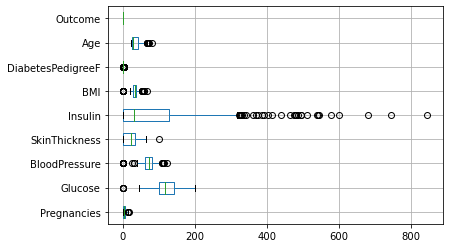

In [8]:
df.boxplot(vert=False)

In [9]:
# Decision Tree not sensitive to outliers

## Train Test Split

In [10]:
X = df.drop('Outcome', axis=1)
y = df['Outcome']

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 1)

In [12]:
df.shape

(768, 9)

In [13]:
X_train.shape

(537, 8)

In [14]:
X_test.shape

(231, 8)

In [15]:
y_train.shape

(537,)

In [16]:
y_test.shape

(231,)

## Model Building

In [43]:
model = DecisionTreeClassifier()

In [55]:
def model_builder (estimator, metric,X,y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 1)
    model = estimator()
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    result = accuracy_score(y_test, y_pred)
    return result

In [56]:
model_builder(DecisionTreeClassifier, accuracy_score, X,y)

0.6883116883116883

In [18]:
#model.fit(X_train,y_train)

DecisionTreeClassifier()

In [19]:
#y_pred = model.predict(X_test)

## Model Evaluation

In [20]:
accuracy_score(y_test,y_pred)

0.696969696969697

In [21]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.75      0.79      0.77       146
           1       0.60      0.54      0.57        85

    accuracy                           0.70       231
   macro avg       0.67      0.66      0.67       231
weighted avg       0.69      0.70      0.69       231



In [22]:
#whats is Macro Avg??


## Overfitting Check

In [23]:
y_train_pred = model.predict(X_train)

In [24]:
accuracy_score(y_train,y_train_pred)

1.0

In [25]:
y_train_pred

array([1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,

In [26]:
np.array(y_train)

array([1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,

## Overfitting Check

In [27]:
y_train_pred = model.predict(X_train)

Decision Tree is a OVERFITTING MODEL.
-It basically gives good accuracy for the training data and gives poor accuracy for testing data. In other terms it overfits the training data and cannot GENERALIZE the test data.


## Stratified K-fold CV

In [28]:
stf = StratifiedKFold(n_splits=10)

In [29]:
stf.get_n_splits(X=X, y=y)


10

In [30]:
dtc = DecisionTreeClassifier()


In [31]:
accuracy =  []
for train_index, test_index in stf.split(X,y):
   # print('Train' , train_index, 'Test= test_index')
    X1_train,X1_test = X.iloc[train_index], X.iloc[test_index] #Fetching the original data points using iloc
    y1_train, y1_test = y.iloc[train_index], y.iloc[test_index]
    dtc.fit(X1_train,y1_train)
    y1_pred = dtc.predict(X1_test)
    accuracy.append(accuracy_score(y1_test, y1_pred))


In [32]:
accuracy

[0.6753246753246753,
 0.7142857142857143,
 0.6883116883116883,
 0.5584415584415584,
 0.6883116883116883,
 0.7402597402597403,
 0.8181818181818182,
 0.7792207792207793,
 0.6052631578947368,
 0.7763157894736842]

In [33]:
np.mean(accuracy)

0.7043916609706085

In [34]:
X.shape

(768, 8)

## Hyperparameter Tuning using GridsearchCV

In [35]:
param = {'min_weight_fraction_leaf': [0.0, 0.1, 0.2, 0.3], 'max_features': ['auto', 'sqrt', 'log2', 1,2,3,4,5,6,7,8,0.5]}

In [36]:
gcv = GridSearchCV(estimator=dtc, param_grid=param, cv=10)

In [37]:
gcv.fit(X,y)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(),
             param_grid={'max_features': ['auto', 'sqrt', 'log2', 1, 2, 3, 4, 5,
                                          6, 7, 8, 0.5],
                         'min_weight_fraction_leaf': [0.0, 0.1, 0.2, 0.3]})

In [38]:
gcv.best_params_

{'max_features': 4, 'min_weight_fraction_leaf': 0.1}

In [39]:
dtc= DecisionTreeClassifier(max_features=7, min_weight_fraction_leaf=0.1)

In [40]:
accuracy = []
for train_index, test_index in stf.split(X,y):
   # print('Train' , train_index, 'Test= test_index')
    X1_train,X1_test = X.iloc[train_index], X.iloc[test_index] #Fetching the original data points using iloc
    y1_train, y1_test = y.iloc[train_index], y.iloc[test_index]
    dtc.fit(X1_train,y1_train)
    y1_pred = dtc.predict(X1_test)
    accuracy.append(accuracy_score(y1_test, y1_pred))

In [41]:
np.mean(accuracy)

0.7343814080656187